In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=cab48f42947b79cee5e78b496175ffcbbf7c7802881e19a26a1f268ef523d6b8
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedr

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/09/25 03:22:03] INFO     No custom team name replacements found. You can configure these in       ]8;id=688157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=711668;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=536526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=613387;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2425)
print(fbref.__doc__)

[06/09/25 03:22:07] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=943743;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=831969;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/09/25 03:22:14] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=145211;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=882274;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [8]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/09/25 03:22:30] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=776953;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=8008;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Performance                 \
                                                       CrdY CrdR 2CrdY Fls   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White               2    0     0  10   
                                  Bukayo Saka             3    0     0  15   
                                  David Raya              3    0     0   1   
                                  Declan Rice             7    1     1  21   
                                  Ethan Nwaneri           1    0     0   9   

                                                     ...                      \
                                                Fld  ...  Crs Int TklW PKwon   
league             season team    player             ...                       
ENG-Premier League 2425   Arsenal Ben White       5  ...   17  16   14     0   
                                  Bukayo Saka    39  ...  117   3   15     1   
                                  David Raya     10  ...    0   2    0     0   
                                  Declan Rice    16  ...  164  25   25     0   
                                  Ethan Nwaneri   5  ...   54   2    7     0   

                                                               Aerial Duels  \
                                                PKcon OG Recov          Won   
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White         0  0    37           18   
                                  Bukayo Saka       0  0    70           10   
                                  David Raya        1  0    41           13   
                                  Declan Rice       0  0   156           37   
                                  Ethan Nwaneri     0  0    34            4   

                                                             
                                                Lost   Won%  
league             season team    player                     
ENG-Premier League 2425   Arsenal Ben White        9   66.7  
                                  Bukayo Saka     20   33.3  
                                  David Raya       0  100.0  
                                  Declan Rice     25   59.7  
                                  Ethan Nwaneri    8   33.3  

[5 rows x 21 columns]

In [9]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Performance  ...                                    Aerial Duels       \
               CrdY  ...  Crs Int TklW PKwon PKcon OG Recov          Won Lost   
0  13.3           2  ...   17  16   14     0     0  0    37           18    9   
1  19.2           3  ...  117   3   15     1     0  0    70           10   20   
2  38.0           3  ...    0   2    0     0     1  0    41           13    0   
3  31.4           7  ...  164  25   25     0     0  0   156           37   25   
4   9.9           1  ...   54   2    7     0     0  0    34            4    8   

          
    Won%  
0   66.7  
1   33.3  
2  100.0  
3   59.7  
4   33.3  

[5 rows x 25 columns]

In [10]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

[06/09/25 03:22:39] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=15049;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=944970;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Tackles                       \
                                                    Tkl TklW Def 3rd Mid 3rd   
league             season team    player                                       
ENG-Premier League 2425   Arsenal Ben White          20   14      10       4   
                                  Bukayo Saka        29   15       9      11   
                                  David Raya          0    0       0       0   
                                  Declan Rice        53   25      22      25   
                                  Ethan Nwaneri      11    7       4       4   

                                                         ... Challenges        \
                                                Att 3rd  ...        Att  Tkl%   
league             season team    player                 ...                    
ENG-Premier League 2425   Arsenal Ben White           6  ...         38  42.1   
                                  Bukayo Saka         9  ...         24  54.2   
                                  David Raya          0  ...          2   0.0   
                                  Declan Rice         6  ...         41  41.5   
                                  Ethan Nwaneri       3  ...         21  33.3   

                                                     Blocks          Int  \
                                                Lost Blocks  Sh Pass       
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       22     10   8    2  16   
                                  Bukayo Saka     11     22   0   22   3   
                                  David Raya       2      0   0    0   2   
                                  Declan Rice     24     27  13   14  25   
                                  Ethan Nwaneri   14      8   2    6   2   

                                                Tkl+Int Clr Err  
                                                                 
league             season team    player                         
ENG-Premier League 2425   Arsenal Ben White          36  44   0  
                                  Bukayo Saka        32   8   0  
                                  David Raya          2  21   9  
                                  Declan Rice        78  51   0  
                                  Ethan Nwaneri      13   4   1  

[5 rows x 21 columns]

In [11]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Tackles  ... Challenges            Blocks          Int Tkl+Int Clr Err  
            Tkl  ...        Att  Tkl% Lost Blocks  Sh Pass                      
0  13.3      20  ...         38  42.1   22     10   8    2  16      36  44   0  
1  19.2      29  ...         24  54.2   11     22   0   22   3      32   8   0  
2  38.0       0  ...          2   0.0    2      0   0    0   2       2  21   9  
3  31.4      53  ...         41  41.5   24     27  13   14  25      78  51   0  
4   9.9      11  ...         21  33.3   14      8   2    6   2      13   4   1  

[5 rows x 25 columns]

In [12]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [13]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost','Performance_Fls','Performance_CrdY','Performance_CrdR','Performance_2CrdY']
]
df_def_selected = player_season_def[
    ['player_', 'team_','Challenges_Tkl', 'Challenges_Att','Challenges_Tkl%','Int_', 'Err_']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

         player_    team_   pos_  Playing Time_Min  Progression_PrgC  \
0      Ben White  Arsenal     DF              1198                23   
1    Bukayo Saka  Arsenal  FW,MF              1729                96   
2     David Raya  Arsenal     GK              3420                 0   
3    Declan Rice  Arsenal     MF              2825                90   
4  Ethan Nwaneri  Arsenal  FW,MF               895                46   

   Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  Aerial Duels_Lost  \
0                59               66.7                18                  9   
1                70               33.3                10                 20   
2                14              100.0                13                  0   
3               192               59.7                37                 25   
4                33               33.3                 4                  8   

   Performance_Fls  Performance_CrdY  Performance_CrdR  Performance_2CrdY  \
0              

In [14]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


               player_    team_ pos_  Playing Time_Min  Progression_PrgC  \
0            Ben White  Arsenal   DF              1198                23   
6    Gabriel Magalhães  Arsenal   DF              2363                10   
8         Jakub Kiwior  Arsenal   DF              1122                 5   
10      Jurriën Timber  Arsenal   DF              2417                57   
16  Myles Lewis-Skelly  Arsenal   DF              1369                37   

    Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  Aerial Duels_Lost  \
0                 59               66.7                18                  9   
6                126               58.9                53                 37   
8                 48               45.8                11                 13   
10               146               52.4                22                 20   
16                71               52.4                11                 10   

    Performance_Fls  Performance_CrdY  Performance_CrdR  Perfo

In [15]:
# Selecionar as colunas desejadas para análise
Zag = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Performance_Fls'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Challenges_Tkl'),
    ('Challenges_Att'),
    ('Challenges_Tkl%'),
    ('Int_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Zag.columns = ['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Zag.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
Zag['Aerial Duels '] = (
    Zag['Aerial Duel%'].astype(str) + '% (' +
    Zag['Aerial Duel Won'].astype(str) + '/' +
    Zag['Aerial Duel Lost'].astype(str) + ')')
# Remover jogadores com todas as métricas iguais a 0
Zag = Zag[(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos',]] != 0).any(axis=1)]

# Exportar o dataframe para um arquivo CSV
Zag.to_csv('Zag_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
Zag.head


               jogador     time posicao  Minutos  Prgc  PrgP  Aerial Duel%  \
0            Ben White  Arsenal      DF     1198    23    59          66.7   
6    Gabriel Magalhães  Arsenal      DF     2363    10   126          58.9   
8         Jakub Kiwior  Arsenal      DF     1122     5    48          45.8   
10      Jurriën Timber  Arsenal      DF     2417    57   146          52.4   
16  Myles Lewis-Skelly  Arsenal      DF     1369    37    71          52.4   

    Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  \
0                18                 9     10            2         0   
6                53                37     19            4         0   
8                11                13     10            1         0   
10               22                20     31            7         0   
16               11                10     11            3         2   

    2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  \
0               0      

<bound method NDFrame.head of                  jogador     time posicao  Minutos  Prgc  PrgP  Aerial Duel%  \
0              Ben White  Arsenal      DF     1198    23    59          66.7   
6      Gabriel Magalhães  Arsenal      DF     2363    10   126          58.9   
8           Jakub Kiwior  Arsenal      DF     1122     5    48          45.8   
10        Jurriën Timber  Arsenal      DF     2417    57   146          52.4   
16    Myles Lewis-Skelly  Arsenal      DF     1369    37    71          52.4   
...                  ...      ...     ...      ...   ...   ...           ...   
2838           Jay Idzes  Venezia      DF     3127    15    84          41.3   
2842   Joël Schingtienne  Venezia      DF     1122     5    28          22.2   
2845        Marin Šverko  Venezia      DF     1117     8    38          50.0   
2846     Michael Svoboda  Venezia      DF     1314    13    43          55.6   
2852     Ridgeciano Haps  Venezia      DF     1369    26    52          43.8   

      Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  \
0                  18                 9     10            2         0   
6                  53                37     19            4         0   
8                  11                13     10            1         0   
10                 22                20     31            7         0   
16                 11                10     11            3         2   
...               ...               ...    ...          ...       ...   
2838               57                81     50            5         0   
2842                4                14      7            2         0   
2845               20                20      9            3         0   
2846               35                28      7            1         0   
2852               14                18     14            3         0   

      2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  \
0                 0               16               38       42.1   
6                 0               12               16       75.0   
8                 0               11               15       73.3   
10                0               18               27       66.7   
16                0               10               11       90.9   
...             ...              ...              ...        ...   
2838              0               17               33       51.5   
2842              0               12               19       63.2   
2845              0               10               12       83.3   
2846              0                8               19       42.1   
2852              0               14               22       63.6   

      Interceptacao  Erros  Aerial Duels   
0                16      0   66.7% (18/9)  
6                16      2  58.9% (53/37)  
8                 6      3  45.8% (11/13)  
10               22      1  52.4% (22/20)  
16                7      0  52.4% (11/10)  
...             ...    ...            ...  
2838             32      0  41.3% (57/81)  
2842             14      5   22.2% (4/14)  
2845             16      3  50.0% (20/20)  
2846             22      2  55.6% (35/28)  
2852              7      0  43.8% (14/18)  

[610 rows x 19 columns]>

### **2. Criar modelos de classificação para  (ZAGUEIRO)**

In [16]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Interceptacao','Erros','Desarmes Certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Zag['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes%','Interceptacao','Erros','Desarmes%']])

      Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  \
0       23    59          66.7               18                 9     10   
6       10   126          58.9               53                37     19   
8        5    48          45.8               11                13     10   
10      57   146          52.4               22                20     31   
16      37    71          52.4               11                10     11   
...    ...   ...           ...              ...               ...    ...   
2838    15    84          41.3               57                81     50   
2842     5    28          22.2                4                14      7   
2845     8    38          50.0               20                20      9   
2846    13    43          55.6               35                28      7   
2852    26    52          43.8               14                18     14   

      Yellow Card  Red Card  2 Yellow Card  Desarmes%  Interceptacao  Erros  \
0       

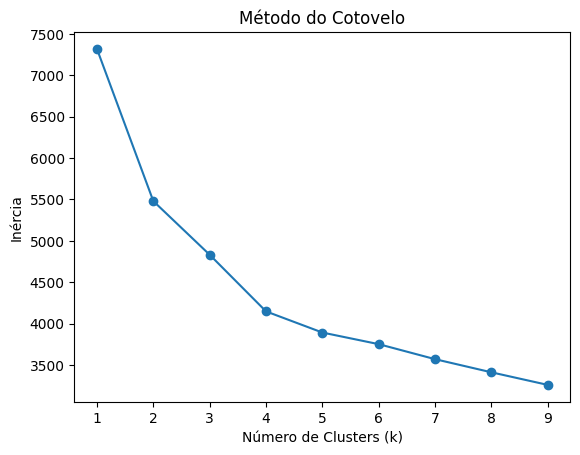

In [17]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [18]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [19]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Zag.groupby('Cluster').agg({col: 'mean' for col in Zag.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos       Prgc        PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                                      
0        2052.761538  15.184615   75.492308     59.326154        45.976923   
1        2416.747967   54.96748  112.723577     48.523577         24.03252   
2        1104.827731  13.113445   41.142857     53.796639        17.794118   
3        2018.891304       27.5   89.173913      59.08913        41.391304   
4        2778.273973  20.835616   101.90411     59.079452        77.260274   

         Aerial Duel Lost      Fouls  Yellow Card  Red Card  2 Yellow Card  \
Cluster                                                                      
0               30.846154  20.430769     4.261538  0.176923            0.0   
1                23.95935  27.642276     4.869919  0.089431            0.0   
2               14.415966  11.705882     2.096639  0.109244            0.0   
3               27.391304  24.391304     6.478261  1.130435    

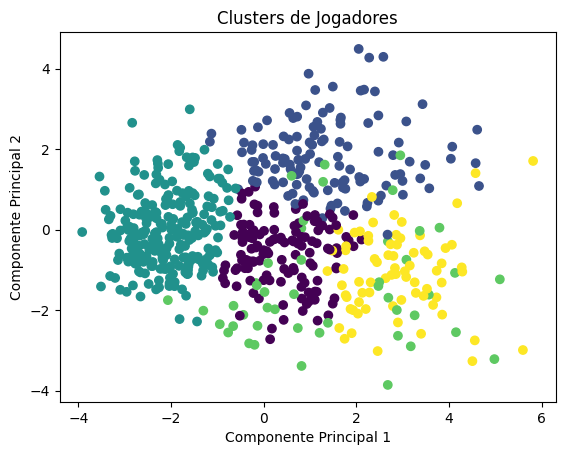

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [21]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Zag.select_dtypes(include=np.number).columns
correlation_matrix = Zag[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      Prgc      PrgP  Aerial Duel%  Aerial Duel Won  \
Minutos           1.000000  0.483352  0.698975     -0.024405         0.587826   
Prgc              0.483352  1.000000  0.620549     -0.296069        -0.125690   
PrgP              0.698975  0.620549  1.000000     -0.012699         0.330775   
Aerial Duel%     -0.024405 -0.296069 -0.012699      1.000000         0.477769   
Aerial Duel Won   0.587826 -0.125690  0.330775      0.477769         1.000000   
Aerial Duel Lost  0.697627  0.035051  0.375690     -0.021977         0.794623   
Fouls             0.654614  0.299830  0.396303     -0.032598         0.414248   
Yellow Card       0.535514  0.212027  0.323386      0.022853         0.377434   
Red Card          0.044563 -0.017597  0.046439      0.096044         0.086025   
2 Yellow Card     0.061182  0.039481  0.095580      0.107256         0.081564   
Desarmes Certos   0.642181  0.491490  0.493486     -0.147880         0.167485   
Desarmes Totais   0.624514  

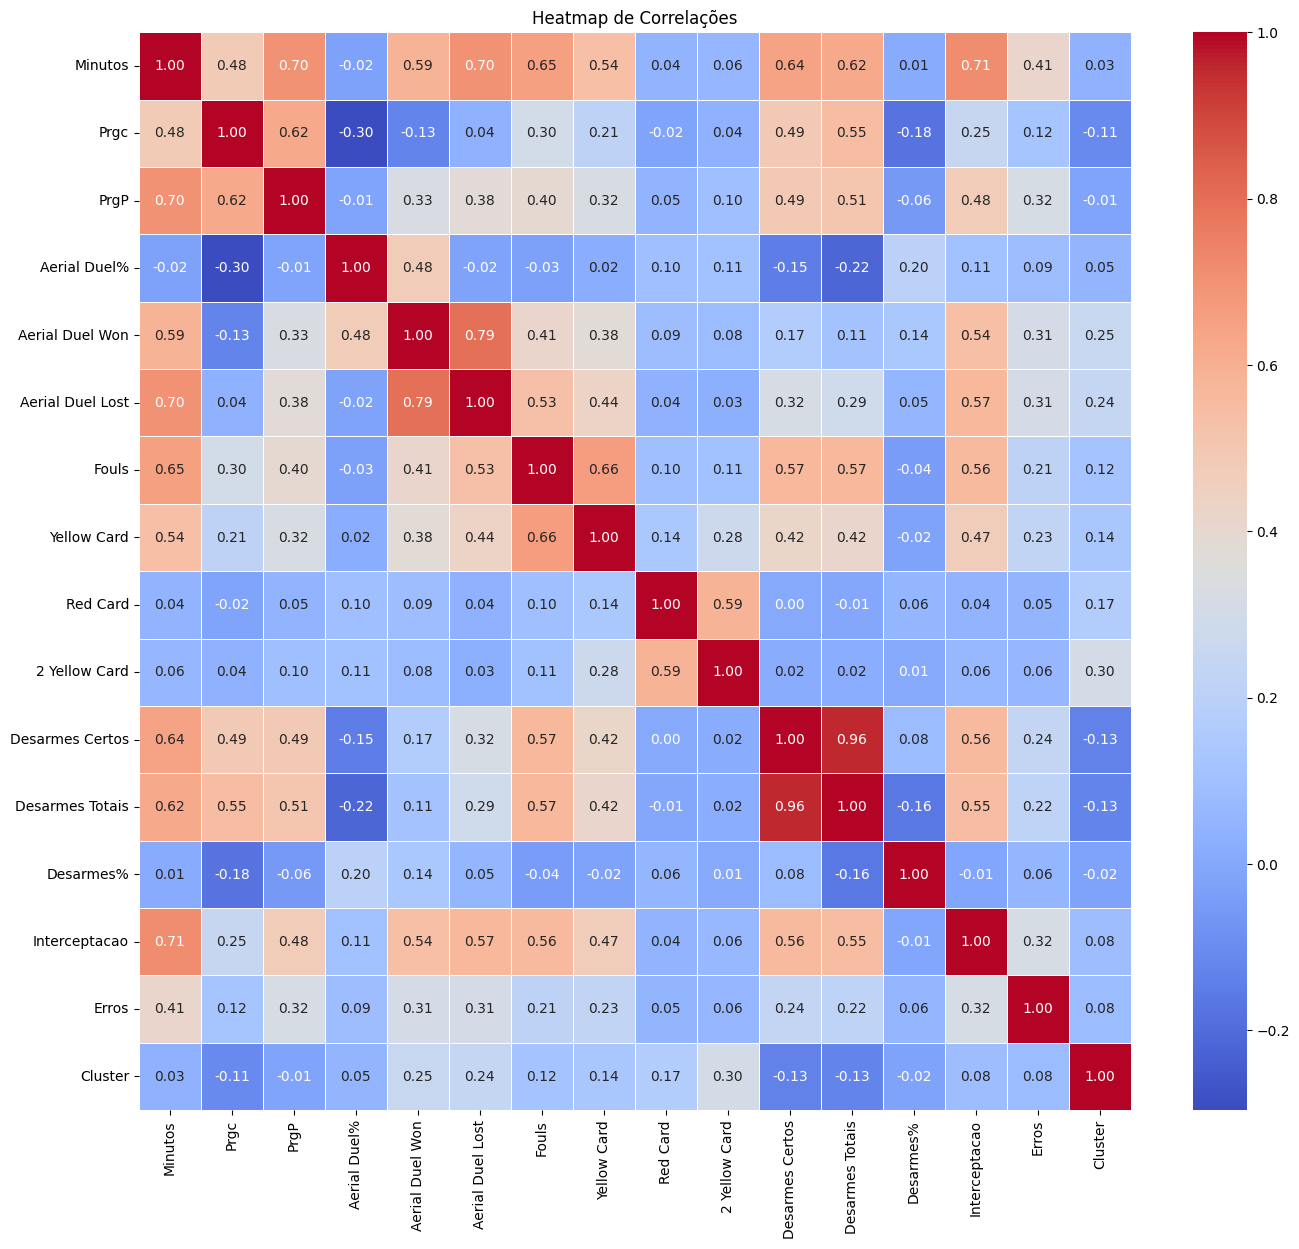

In [22]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

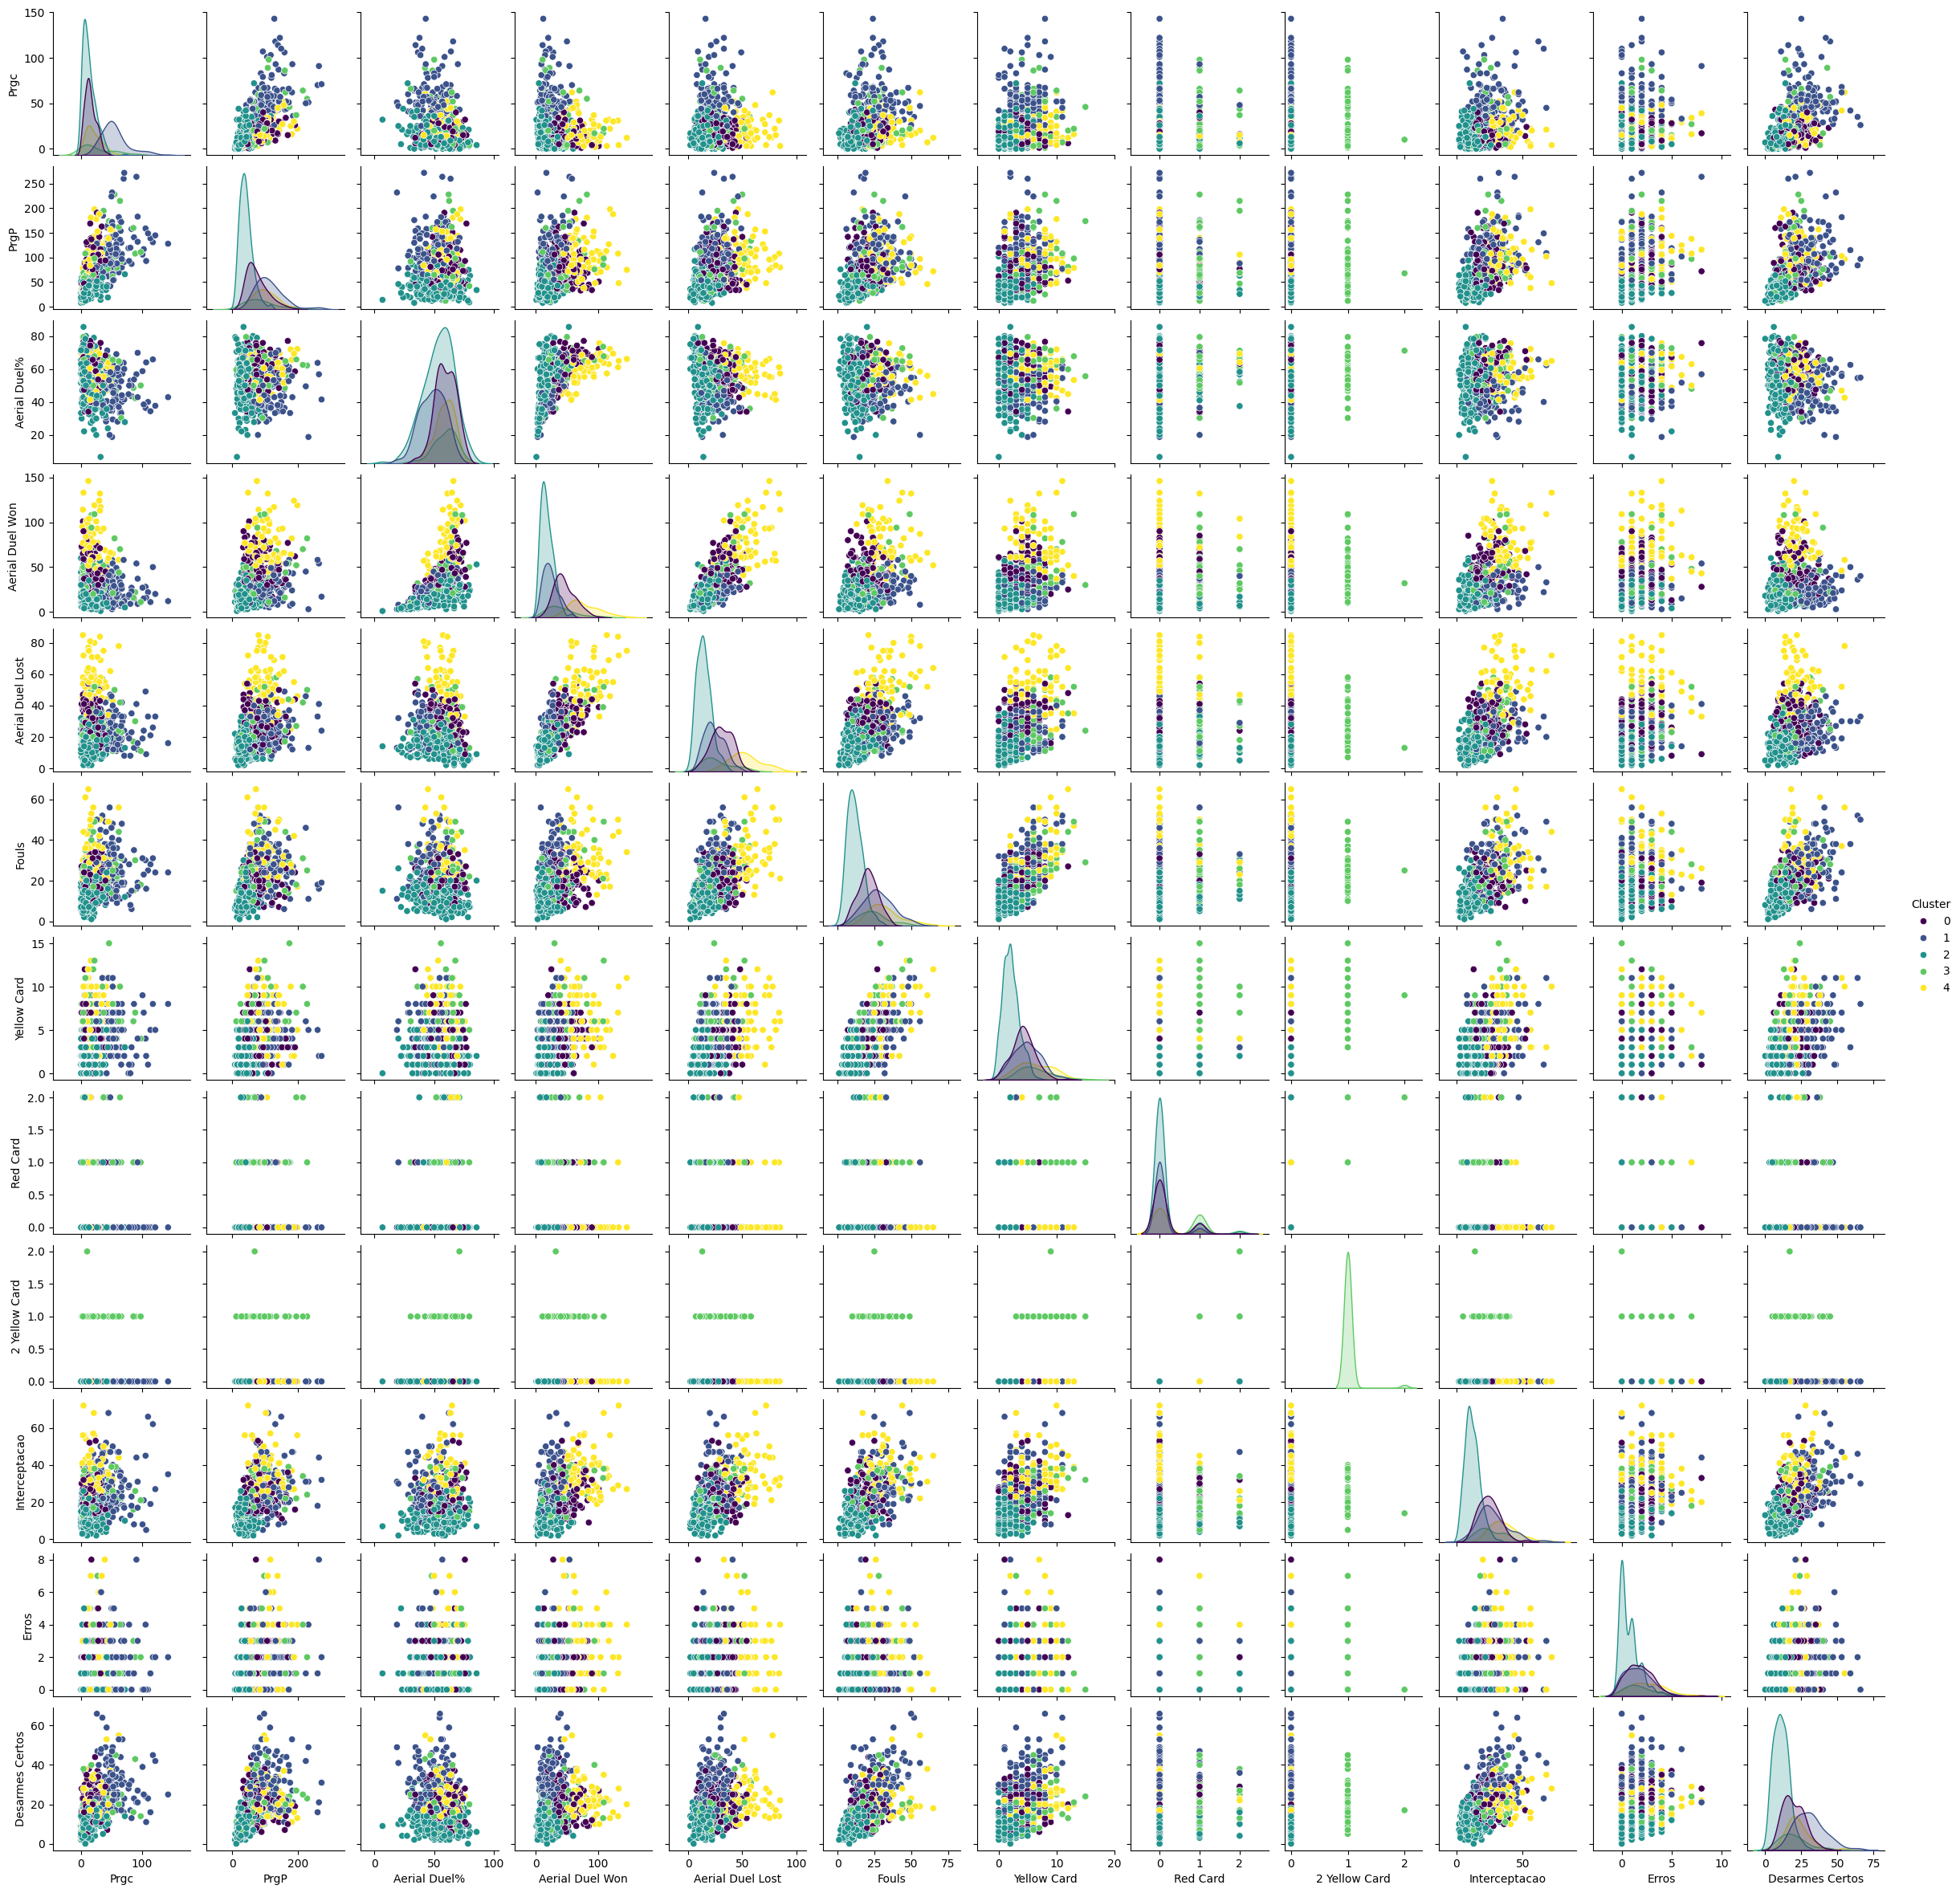

In [23]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Interceptacao','Erros','Desarmes Certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Zag[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Zagueiros**

---

### **1. Análise de Correlações com Insights**

### 🔐 Correlações Fortes Positivas

#### **Desarmes Totais ↔ Desarmes Certos (0.96)**

🔁 Zagueiros que realizam mais tentativas de desarmes naturalmente convertem mais desarmes certos.

✅ Demonstra **eficiência defensiva** e um volume alto de ações defensivas no geral.

---

#### **Interceptações ↔ Minutos (0.71)**

⏱️ Quanto mais tempo o zagueiro está em campo, maior tende a ser seu número de interceptações.

👉 Esse dado reforça que **tempo em campo afeta diretamente as métricas acumulativas**.

---

#### **Aerial Duels Won ↔ Aerial Duels (0.79)**

📊 Alta correlação entre disputas aéreas vencidas e o total de duelos aéreos disputados.

⚔️ Isso indica que **os zagueiros mais acionados no jogo aéreo tendem também a ter bom desempenho** nessas jogadas.

---

#### **Faltas ↔ Cartões Amarelos (0.66)**

🟨 Zagueiros que cometem mais faltas tendem a receber mais cartões amarelos.

👉 Sinal de **jogadores que quebram jogadas com faltas táticas** ou se expõem defensivamente.

---

#### **Minutos ↔ Desarmes Totais (0.65) / Faltas (0.65)**

⏳ Quanto mais minutos em campo, maior o volume de ações defensivas (inclusive faltas).

📌 Não necessariamente uma medida de qualidade, mas sim de **envolvimento defensivo contínuo**.

---

### ⚠️ Correlações Potencialmente Problemáticas

#### **Faltas ↔ Aerial Duel Lost (0.53)**

💥 Sugere que zagueiros que perdem mais disputas aéreas também **cometem mais faltas** — talvez por estarem mal posicionados ou tentando recuperar após erro.

---

#### **Erros ↔ Faltas (0.23) / Interceptações (0.32)**

🤔 Zagueiros com mais erros também aparecem mais nas interceptações e faltas — pode indicar **excesso de risco ou exposição em situações críticas**.

---

### 📉 Correlações Fracas ou Nulas

* **Desarmes%** tem correlação quase nula com **Minutos, Interceptações e Cartões** — ou seja, **eficiência nos desarmes não depende do tempo em campo ou agressividade**.
* **Cluster ↔ variáveis principais** têm correlação fraca (maior parte < 0.15), o que indica que os agrupamentos não dependem fortemente de uma única métrica isolada.

---

### 🛡️ Zagueiro Ideal segundo a correlação

Um perfil ideal teria:

* Alto número de **Desarmes Certos** e **Totais**,
* Forte desempenho em **duelos aéreos vencidos**,
* Alta **taxa de interceptações**,
* Baixa incidência de **faltas e erros**,
* Boa **eficiência de desarme** (Desarmes%).

---

---

### **2. Perfis dos Clusters com Médias**

Perfeito! Com base nos dados do perfil de **zagueiros** apresentados no print, temos as médias por **cluster** de várias métricas defensivas e disciplinares. Vamos interpretar os **5 clusters** a partir dessas médias. Aqui está uma análise resumida de cada perfil de zagueiro:

---

### 🔵 **Cluster 0 – Zagueiros Regulares e Completos**

* **Minutos**: 2052 min – presença consistente em campo.
* **Desarmes%**: 64.3% – ótimo aproveitamento.
* **Interceptações**: 24.6 – bom nível.
* **Aerial Duel%**: 59.3% – sólido no jogo aéreo.
* **Faltas e Cartões**: baixos (4.2 amarelos, 0.17 vermelhos).

🔹 **Perfil**: Zagueiro confiável, atua bastante, bom nas interceptações e desarmes, com bom equilíbrio entre técnica e disciplina.

---

### 🟢 **Cluster 1 – Zagueiros Defensores e de Alta Intensidade**

* **Minutos**: 2416 min – muito utilizado.
* **PrgP**: 112.7 – alto envolvimento na progressão de jogadas.
* **Desarmes Totais**: 52.2 – extremamente ativo.
* **Interceptações**: 27.7 – ótimo posicionamento.
* **Faltas**: 27.6 – comete mais faltas, porém poucos cartões.

🔹 **Perfil**: Zagueiro de alto volume de jogo defensivo, intercepta e desarma muito, participa da saída de bola. Estilo agressivo, mas controlado.

---

### 🟡 **Cluster 2 – Zagueiros Reservas ou Pouco Utilizados**

* **Minutos**: 1104 – tempo de jogo mais baixo.
* **Aerial Duel Won**: 17.8% – muito baixo.
* **Desarmes e Interceptações**: baixos.
* **Faltas**: 11.7 – pouco envolvido em lances faltosos.

🔹 **Perfil**: Provavelmente reservas ou jovens em desenvolvimento. Menor participação geral e impacto defensivo.

---

### 🔴 **Cluster 3 – Zagueiros Agressivos e de Alto Risco**

* **Faltas**: 24.4 – elevado.
* **Cartões**: 6.5 amarelos e 1.1 vermelhos – mais indisciplinados.
* **Desarmes%**: 61.9% – bom.
* **Aerial Duel Won**: 41.4% – razoável.

🔹 **Perfil**: Zagueiros combativos, mas com tendência à indisciplina. Atuam com intensidade e correm riscos.

---

### 🟣 **Cluster 4 – Zagueiros Experientes, Bons no Jogo Aéreo**

* **Minutos**: 2778 min – muito utilizados.
* **Aerial Duel Won**: 77.3% – **excelente no jogo aéreo**.
* **Interceptações**: 36.3 – muito bom.
* **Desarmes%**: 63.3% – sólido.
* **Faltas e Cartões**: altos, mas controlados.

🔹 **Perfil**: Zagueiros experientes, dominam o jogo aéreo e interceptam com eficiência. Provavelmente líderes defensivos.

---

### ✅ Resumo dos Perfis

| Cluster | Estilo                       | Minutos | Aerial Duel% | Desarmes% | Interceptações | Perfil                          |
| ------: | ---------------------------- | ------- | ------------ | --------- | -------------- | ------------------------------- |
|       0 | Equilibrados e consistentes  | 2053    | 59.3         | 64.3      | 24.6           | Regulares, boa leitura de jogo  |
|       1 | Intensos e participativos    | 2417    | 48.5         | 60.0      | 27.7           | Ativos na marcação e construção |
|       2 | Jovens ou reservas discretos | 1105    | 53.8         | 61.4      | 11.9           | Baixo impacto, menos utilizados |
|       3 | Agressivos e de alto risco   | 2019    | 59.1         | 61.9      | 24.7           | Alta intensidade e indisciplina |
|       4 | Líderes aéreos e experientes | 2778    | **77.3**     | 63.3      | **36.3**       | Dominantes no alto, boa leitura |


---



In [30]:
cluster_names = {
    0: 'zagueiros completo',
    1: 'zagueiros moderno',
    2: 'zagueiros sr',
    3: 'zagueiros agressivo',
    4: 'zagueiros lider',
}

# Adicionar nomes ao DataFrame
Zag['Perfil'] = Zag['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Zag[['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros','Perfil']].head())

               jogador     time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros              Perfil
0            Ben White  Arsenal      DF     1198    23    59          66.7               18                 9     10            2         0              0               16               38       42.1             16      0        zagueiros sr
6    Gabriel Magalhães  Arsenal      DF     2363    10   126          58.9               53                37     19            4         0              0               12               16       75.0             16      2  zagueiros completo
8         Jakub Kiwior  Arsenal      DF     1122     5    48          45.8               11                13     10            1         0              0               11               15       73.3              6      3        zagueiros sr
10      Jurriën Timber  Arsenal 

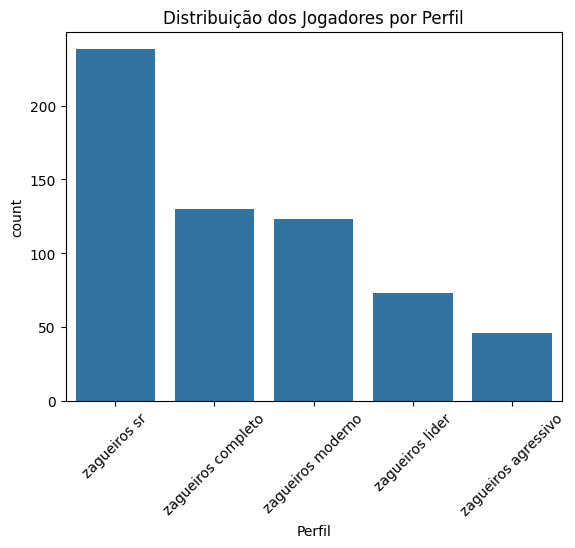

In [31]:
sns.countplot(data=Zag, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [32]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "zagueiros moderno"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: zagueiros moderno
                    jogador         time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
10           Jurriën Timber      Arsenal      DF     2417    57   146          52.4               22                20     31            7         0              0               18               27       66.7             22      1
45               Matty Cash  Aston Villa      DF     2070    48    42          50.0               20                20     27            7         0              0               31               43       72.1             23      2
75             Milos Kerkez  Bournemouth      DF     3336   106   159          36.4               28                49     30            4         0              0               24               38       63.2             45      4
130            Joël Veltman     Brig

In [34]:
# Dicionário dos peso para cada métrica
pesos = {
    'Prgc': 2,
    'PrgP': 2,
    'Aerial Duel Won': 10,
    'Fouls': -3,
    'Yellow Card': -5,
    'Red Card': -10,
    'Desarmes Certos': 10,
    'Interceptacao' : 5,
    'Erros' : -2

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Zag[coluna + '_Pontuacao'] = Zag[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Zag['Pontuacao_Total'] = Zag[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Zag['Pontuacao_Total'].min()
max_pontuacao = Zag['Pontuacao_Total'].max()
Zag['Pontuacao'] = (
    (Zag['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'zagueiros lider'
jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: zagueiros lider
 Ranking           time posicao               jogador          Perfil  Pontuacao
       1     Heidenheim      DF        Patrick Mainka zagueiros lider      100.0
       2      Liverpool      DF       Virgil van Dijk zagueiros lider  99.780942
       3  Hellas Verona      DF         Diego Coppola zagueiros lider  96.056955
       4         Napoli      DF         Amir Rrahmani zagueiros lider  92.935378
       5  Newcastle Utd      DF              Dan Burn zagueiros lider  91.456736
       6      Brentford      DF        Nathan Collins zagueiros lider  89.047097
       7       West Ham      DF            Max Kilman zagueiros lider  87.513691
       8       Mallorca      DF        Antonio Raillo zagueiros lider  84.994524
       9   Ipswich Town      DF           Dara O'Shea zagueiros lider   79.73713
      10   Union Berlin      DF           Diogo Leite zagueiros lider  78.915663
      11        Bologna      DF           Sam Beukema zaguei

In [28]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'zagueiros modernos'  # Defina o perfil desejado
jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'zagueiros modernos': ['Jan Paul van Hecke', 'Marc Cucurella', 'Chris Richards', 'Marc Guéhi', 'Axel Tuanzebe', 'Djed Spence', 'Konstantinos Mavropanos', 'Rayan Aït-Nouri', 'Aitor Paredes', 'Marcos Alonso', 'Domingos Duarte', 'Juan Berrocal', 'Ki-Jana Hoever', 'Massadio Haïdara', 'Facundo Medina', 'Bafodé Diakité', 'Derek Cornelius', 'Leonardo Balerdi', 'Vanderson', 'Boubakar Kouyaté', 'Moïse Bombito', 'Joseph Okumu', 'Maxime Bernauer', 'Cedric Zesiger', 'Keven Schlotterbeck', 'Julian Ryerson', 'Nico Schlotterbeck', 'Arthur Theate', 'Álex Grimaldo', 'Andreas Hanche-Olsen', 'Julian Chabot', 'Marco Friedl', 'Niklas Stark', 'Yerry Mina', 'Edoardo Goldaniga', 'Marc-Oliver Kempf', 'Marin Pongračić', 'Nicolás Valentini', 'Alessandro Bastoni', 'Nuno Tavares', 'Fikayo Tomori', 'Pablo Marí', 'Lautaro Valenti', 'Hassane Kamara', 'Jaka Bijol', 'Oumar Solet']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ra


Jogadores selecionados: Virgil van Dijk, Murillo, Alexsandro Ribeiro, Patrick Mainka
      Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
337      3330    22   198          72.1              119                46     17            5         0              0               13               22       59.1             56      4
438      3188    22   115          66.7               44                22     27            6         0              0               27               46       58.7             36      3
1329     2700    25   178          71.9               64                25     28           10         0              0               20               30       66.7             27      3
1940     3060    21   102          63.7              109                62     17            3         0              0               35               55       63.6  

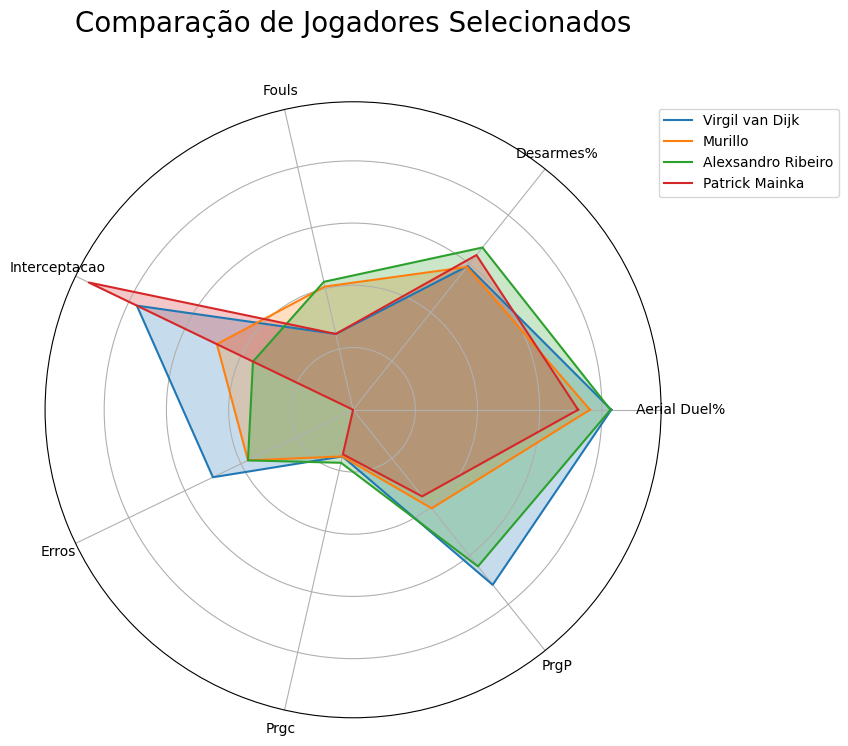

In [41]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Aerial Duel%', 'Desarmes%', 'Fouls', 'Interceptacao','Erros','Prgc', 'PrgP',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Murillo', 'Patrick Mainka','Virgil van Dijk','Alexsandro Ribeiro',]  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Zag)